##Obtendo as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
#np.set_printoptions (precision=2)
#pd.set_option ('precision',2)

## Descrição do data set:
Link base de dados: https://www.kaggle.com/datasets/tbierhance/hm-fashion-recommendation-parquet


Histórico de vendas de produtos da loja H&M, algumas alterações nos atributos originais foram feitas:

clientes.age==NA foi mapeado para -1

clientes.customer_id foi convertido em inteiros, mapeamentos para ids originais em customer_ids.parquet

customer.postal_code foi convertido em inteiros,

a maioria das categorias de artigos foi convertida em variáveis ​​categóricas, 

os ids de categoria originais foram descartados

yearday - representação inteira da data, varia de 0 a 733, 

semana - representação inteira da semana, varia de 0 a 104, 

day_name - nome do dia ('Segunda-feira', …)

##Importando os arquivos para o ambiente

In [ ]:
articles = pd.read_parquet('/content/drive/MyDrive/H&M/articles.parquet', engine= "auto")
customer_ids = pd.read_parquet('/content/drive/MyDrive/H&M/customer_ids.parquet', engine= "auto")
customers = pd.read_parquet('/content/drive/MyDrive/H&M/customers.parquet', engine= "auto")
sales = pd.read_parquet('/content/drive/MyDrive/H&M/sales.parquet', engine= "auto")
sample_submission = pd.read_parquet('/content/drive/MyDrive/H&M/sample_submission.parquet', engine= "auto")
transactions_train = pd.read_parquet('/content/drive/MyDrive/H&M/transactions_train.parquet', engine= "auto")

##Explorando os aquivos

In [ ]:
#Artigos vendidos na loja
print("\nDimesões bases de dados articles:\n{0}\n".format(articles.shape))
print("\nCampos:\n{0}\n".format(articles.keys()))
print("\nTipos de dados:\n{0}\n".format(articles.dtypes))


Dimesões bases de dados articles:
(105542, 15)


Campos:
Index(['article_id', 'product_code', 'prod_name', 'product_group_name',
       'department_no', 'department_name', 'detail_desc', 'product_type',
       'graphical_appearance', 'colour_group', 'perceived_colour_value',
       'perceived_colour_master', 'index', 'index_group', 'garment_group'],
      dtype='object')


Tipos de dados:
article_id                    int32
product_code                  int32
prod_name                    object
product_group_name         category
department_no                 int32
department_name              object
detail_desc                  object
product_type               category
graphical_appearance       category
colour_group               category
perceived_colour_value     category
perceived_colour_master    category
index                      category
index_group                category
garment_group              category
dtype: object



In [ ]:
#Transformação Cliente da base e cliente original da loja
print("\nDimesões bases de dados customer_ids:\n{0}\n".format(customer_ids.shape))
print("\nCampos\n{0}\n".format(customer_ids.keys()))
print("\nTipos de dados:\n{0}\n".format(customer_ids.dtypes))



Dimesões bases de dados customer_ids:
(1371980, 2)


Campos
Index(['customer_id', 'customer_id_original'], dtype='object')


Tipos de dados:
customer_id              int32
customer_id_original    object
dtype: object



In [ ]:
#Dados das transações
print("\nDimesões bases de dados transactions_train :\n{0}\n".format(transactions_train .shape))
print("\nCampos:\n{0}\n".format(transactions_train .keys()))
print("\nTipos de dados:\n{0}\n".format(transactions_train .dtypes))
transactions_train .head()



Dimesões bases de dados transactions_train :
(31788324, 5)


Campos:
Index(['t_dat', 'customer_id_original', 'article_id', 'price',
       'sales_channel_id'],
      dtype='object')


Tipos de dados:
t_dat                    object
customer_id_original     object
article_id                int64
price                   float64
sales_channel_id          int64
dtype: object



,t_dat,customer_id_original,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.05,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.03,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.02,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.02,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.02,2


In [ ]:
#Dados do Cliente da loja
print("\nDimesões bases de dados customer:\n{0}\n".format(customers.shape))
print("\nCampos:\n{0}\n".format(customers.keys()))
print("\nTipos de dados:\n{0}\n".format(customers.dtypes))



Dimesões bases de dados customer:
(1371980, 7)


Campos:
Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


Tipos de dados:
customer_id                  int32
FN                            bool
Active                        bool
club_member_status        category
fashion_news_frequency    category
age                           int8
postal_code                  int32
dtype: object



In [ ]:
#Dados das vendas da loja
print("\nDimesões bases de dados sales:\n{0}\n".format(sales.shape))
print("\nCampos:\n{0}\n".format(sales.keys()))
print("\nTipos de dados:\n{0}\n".format(sales.dtypes))

sales.head()


Dimesões bases de dados sales:
(31788324, 6)


Campos:
Index(['yearday', 'week', 'customer_id', 'article_id', 'price',
       'online_channel'],
      dtype='object')


Tipos de dados:
yearday             int16
week                 int8
customer_id         int32
article_id          int32
price             float32
online_channel       bool
dtype: object



,yearday,week,customer_id,article_id,price,online_channel
0,0,0,2,663713001,29.99,True
1,0,0,2,541518023,17.99,True
2,4,0,2,663713001,29.99,True
3,162,23,2,578020002,7.99,True
4,501,71,2,723529001,14.99,True


##Estatística descritiva dos dados

In [ ]:

print("\ntransactions_train:\n", transactions_train.describe())
categ = transactions_train.dtypes[transactions_train.dtypes =="object"].index
print("categ.describe()")

print("\nArticles:\n", articles.describe())
categ1 = articles.dtypes[articles.dtypes != "int32"].index
print("categ1.describe()")


print("\ncustomer_ids:\n",customer_ids .describe())
categ2 = customer_ids.dtypes[customer_ids .dtypes =="object"].index
print("\ncateg2.describe()")

print("\ncustomers:\n",customers.describe())
categ3 = customers.dtypes[customers.dtypes =="category"].index
print("categ3.describe()")

print("\nsales:\n",sales.describe())


transactions_train:
        article_id     price  sales_channel_id
count    3.18e+07  3.18e+07          3.18e+07
mean     6.96e+08  2.78e-02          1.70e+00
std      1.33e+08  1.92e-02          4.56e-01
min      1.09e+08  1.69e-05          1.00e+00
25%      6.33e+08  1.58e-02          1.00e+00
50%      7.15e+08  2.54e-02          2.00e+00
75%      7.87e+08  3.39e-02          2.00e+00
max      9.56e+08  5.92e-01          2.00e+00
categ.describe()

Articles:
        article_id  product_code  department_no
count    1.06e+05     105542.00      105542.00
mean     6.98e+08     698424.56        4532.78
std      1.28e+08     128462.38        2712.69
min      1.09e+08     108775.00        1201.00
25%      6.17e+08     616992.50        1676.00
50%      7.02e+08     702213.00        4222.00
75%      7.97e+08     796703.00        7389.00
max      9.59e+08     959461.00        9989.00
categ1.describe()

customer_ids:
        customer_id
count     1.37e+06
mean      6.86e+05
std       3.96e+05
mi

Contagem de ocorrencias por atributo e tabela

In [ ]:
print ("\nArticles:\n\n",articles.count(),"\n")
print ("\ncustomers:\n\n",customers.count(),"\n")
print ("\nsales:\n\n",sales.count(),"\n")
print ("\ntransactions_train:\n\n",transactions_train.count(),"\n")




Articles:

 article_id                 105542
product_code               105542
prod_name                  105542
product_group_name         105542
department_no              105542
department_name            105542
detail_desc                105126
product_type               105542
graphical_appearance       105542
colour_group               105542
perceived_colour_value     105542
perceived_colour_master    105542
index                      105542
index_group                105542
garment_group              105542
dtype: int64 


customers:

 customer_id               1371980
FN                        1371980
Active                    1371980
club_member_status        1365918
fashion_news_frequency    1355971
age                       1371980
postal_code               1371980
dtype: int64 


sales:

 yearday           31788324
week              31788324
customer_id       31788324
article_id        31788324
price             31788324
online_channel    31788324
dtype: int64 


transac

##Tratando os dados
Trocando o customer id da transations para o id de numeros, para otimizar os dados

In [ ]:
transactions_train.columns = ['t_dat', 'customer_id_original', 'article_id', 'price', 'sales_channel_id']
transactions_train.head()

,t_dat,customer_id_original,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
transactions_train_real =  pd.merge(transactions_train, customer_ids, on='customer_id_original', how='left')
print (transactions_train_real)
transactions_train_real=transactions_train_real.drop(columns=['customer_id_original'])
transactions_train_real.head()

               t_dat                               customer_id_original  \
0         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
3         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
4         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
...              ...                                                ...   
31788319  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788320  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788321  2020-09-22  fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...   
31788322  2020-09-22  fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...   
31788323  2020-09-22  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   

          article_id     price  sales_channel_id  customer_id  
0          663713001  0.050831     

,t_dat,article_id,price,sales_channel_id,customer_id
0,2018-09-20,663713001,0.050831,2,2
1,2018-09-20,541518023,0.030492,2,2
2,2018-09-20,505221004,0.015237,2,7
3,2018-09-20,685687003,0.016932,2,7
4,2018-09-20,685687004,0.016932,2,7


Para realizar os tratamentos incluiremos a customers_real atribuindo os valores da customers

In [ ]:
customers_real =  customers
customers_real.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,False,False,ACTIVE,NONE,49,112978
1,1,False,False,ACTIVE,NONE,25,57312
2,2,False,False,ACTIVE,NONE,24,139156
3,3,False,False,ACTIVE,NONE,54,128529
4,4,True,True,ACTIVE,Regularly,52,52371


##Trabalhando os dados perdidos



As colunas fashion_news_frequency e FN tem dados faltantes, faremos a analise para procurar a melhor inferência

In [ ]:
from pickle import FALSE
from collections import Counter
from enum import unique
print(Counter(customers_real['club_member_status']).keys())
print(Counter(customers_real['club_member_status']).values())

print(Counter(customers_real['fashion_news_frequency']).keys())
print(Counter(customers_real['fashion_news_frequency']).values())
print(Counter(customers_real['FN']).keys())
print(Counter(customers_real['FN']).values())
print(Counter(customers_real['fashion_news_frequency']).keys())
indice = np.where(((customers_real['FN']== False)& ['fashion_news_frequency']!= "Montly")&(customers_real['fashion_news_frequency']!= "Regularly" ))
customers_real.loc[indice]


dict_keys(['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'])
dict_values([1278553, 92960, 467])
dict_keys(['NONE', 'Regularly', 'Monthly'])
dict_values([893722, 477416, 842])
dict_keys([False, True])
dict_values([895050, 476930])
dict_keys(['NONE', 'Regularly', 'Monthly'])


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,False,False,ACTIVE,NONE,49,112978
1,1,False,False,ACTIVE,NONE,25,57312
2,2,False,False,ACTIVE,NONE,24,139156
3,3,False,False,ACTIVE,NONE,54,128529
5,5,False,False,ACTIVE,NONE,-1,61034
...,...,...,...,...,...,...,...
1371968,1371968,False,False,ACTIVE,NONE,40,81794
1371972,1371972,False,False,ACTIVE,NONE,52,19125
1371975,1371975,False,False,ACTIVE,NONE,24,169171
1371976,1371976,False,False,ACTIVE,NONE,21,87255


Pelas análise os FN False e fashion_news_frequency NONE tem correlação, sendo assim, os Nan do fashion frequency serão substituidos por NONE e pela representatividade os Nan do clube de vantagens serão substituidos por active

In [ ]:
#Troca dos Nan na coluna fashion_news_frequency'
customers_real['fashion_news_frequency'].fillna('NONE', inplace=True)
print(Counter(customers_real['fashion_news_frequency']).keys())
print(Counter(customers_real['fashion_news_frequency']).values())

#Troca dos Nan na coluna  club_member_status'
customers_real['club_member_status'].fillna('ACTIVE', inplace=True)
print(Counter(customers_real['club_member_status']).keys())
print(Counter(customers_real['club_member_status']).values())




dict_keys(['NONE', 'Regularly', 'Monthly'])
dict_values([893722, 477416, 842])
dict_keys(['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'])
dict_values([1278553, 92960, 467])


As idades NA trocadas para -1 serão substituidas pela mediana das idades

     customer_id     FN  Active  club_member_status  fashion_news_frequency  \
age                                                                           
-1         15861  15861   15861               15861                   15861   
 16          161    161     161                 161                     161   
 17         9392   9392    9392                9392                    9392   
 18        24323  24323   24323               24323                   24323   
 19        37707  37707   37707               37707                   37707   
..           ...    ...     ...                 ...                     ...   
 95           10     10      10                  10                      10   
 96            3      3       3                   3                       3   
 97            4      4       4                   4                       4   
 98            7      7       7                   7                       7   
 99           13     13      13                  13 

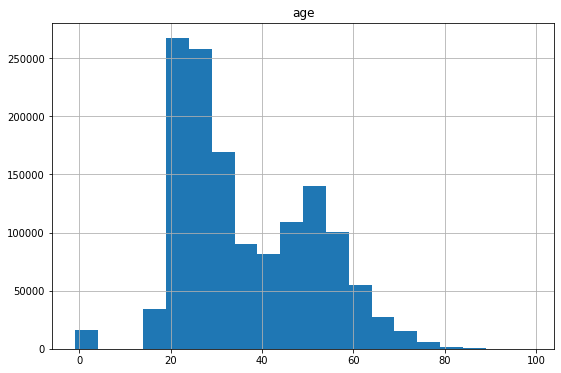

In [ ]:
#Encontrando a distribuição de idades
customers_real.hist(column="age",figsize=(9,6), bins=20)
freq = customers_real.groupby(['age']).count() 
print(freq)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f7c31b50>]],
      dtype=object)

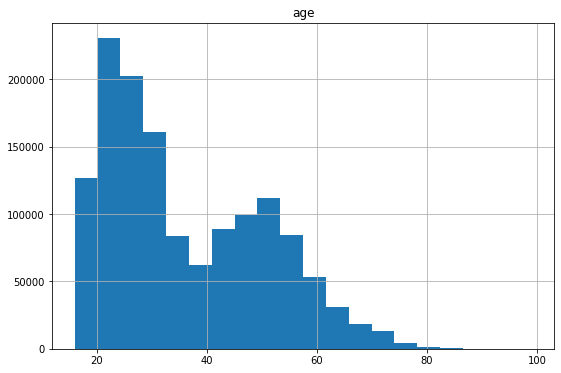

In [ ]:
#Subistituindo as idades faltantes pela mediana
mediana= np.median ([el for el in customers_real["age"] if (np.isnan(el) ==False)])
new_age=np.where(customers_real["age"]==-1, mediana, customers_real["age"])
customers_real["age"]=new_age
customers_real.hist(column="age",figsize=(9,6), bins=20)


In [ ]:
#Transformando o codigo postal em string
print(min(customers["postal_code"]))
print(max(customers["postal_code"]))
char_postal_code = customers_real["postal_code"].astype(str)
customers_real["postal_code"] = char_postal_code
print(customers_real["postal_code"])

0
352898
0          112978
1           57312
2          139156
3          128529
4           52371
            ...  
1371975    169171
1371976     87255
1371977     95707
1371978    188279
1371979     13927
Name: postal_code, Length: 1371980, dtype: object


##Baixando o dataset tratado

In [ ]:
customers_real . to_parquet ('customers_real.parquet') 
transactions_train_real . to_parquet ('transactions_train_real.parquet') 
from google.colab import files
files.download('customers_real.parquet')
files.download('transactions_train_real.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
transactions_train_real.to_parquet ( 'transactions_train_real.parquet') 
files.download('transactions_train_real.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Conclusões
A base possui dados inconclusivos a respeito da localização do cliente, não havendo a possibilidade de realizar um tratamento dos dados capaz de trazer um resultado confiável neste quesito, o que seria um bom direcionador para mostrar o volume de vendas por região.

Mas dentro da massa de dados tratados, foi possível perceber que o volume de vendas foi decrescendo ao longo do tempo, bem como a quantidade de clientes comprando.

Mais de 70% das vendas foi realizada na loja online, e mais de 37% dos clientes estão entre 16 e 30 anos, nos indicando a possibilidade de haver maior identificação do público jovem com este ambiente.

É possível notar também que mais de 90% dos clientes estão ativos no clube de membros, sendo esta uma boa fonte para engajar os clientes e aumentar/recuperar o volume de vendas.

Os departamentos com maior volume de vendas foram o de calças (Trousers), Vestidos (Dress) e suéters (sweater), atingindo 39% do volume total de vendas.

O dashboard se encontra no link:
[H&M](https://app.powerbi.com/view?r=eyJrIjoiYjJkNTJmZmYtNTA4MS00OGIwLTlmMmUtYjA3NGZiZmM4NzJjIiwidCI6IjE0Y2JkNWE3LWVjOTQtNDZiYS1iMzE0LWNjMGZjOTcyYTE2MSIsImMiOjh9&pageName=ReportSection5301ccb00870e075e908)

